# importing Library

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib
from tkinter import *
from tkinter import messagebox

# Importing CSV To Python

In [3]:
df = pd.read_csv('Admission Chance.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          397 non-null    float64
 2   TOEFL Score        383 non-null    float64
 3   University Rating  400 non-null    int64  
 4    SOP               379 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,0.76
2,3,316.0,104.0,3,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,NaN,3.0,8.21,0,0.65


# Check For Missing Value

In [4]:
df.isna().sum()

Serial No             0
GRE Score             3
TOEFL Score          17
University Rating     0
 SOP                 21
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

# Replace Missing Value with Mean

In [5]:
df['GRE Score'].fillna(df['GRE Score'].mean(), inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(), inplace=True)
df[' SOP'].fillna(df[' SOP'].mean(), inplace=True)

In [6]:
df.isna().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Check Heat Map

<AxesSubplot:>

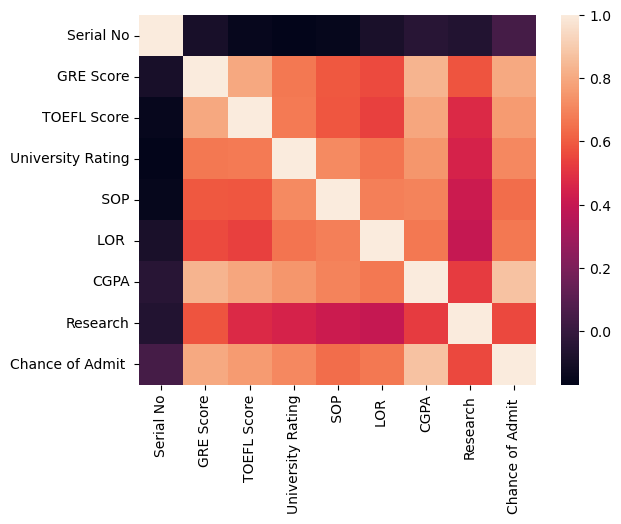

In [7]:
sns.heatmap(df.corr())

# Drop Data With No Correlation

In [8]:
df = df.drop(['Serial No'], axis = 1)

# Standarisasi

In [9]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_df.head())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.761834     1.788633           0.798829  1.122847  1.167321  1.764818   
1   0.627075    -0.093363           0.798829  0.598759  1.167321  0.455151   
2  -0.071239    -0.606634          -0.076600 -0.449415  0.052933 -1.005631   
3   0.452497     0.419909          -0.076600  0.074672 -1.061454  0.119339   
4  -0.245817    -0.777725          -0.952029  0.000000 -0.504260 -0.653029   

   Research  
0  0.909112  
1  0.909112  
2  0.909112  
3  0.909112  
4 -1.099975  


# Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Regression)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)
y_pred_gr = gr.predict(X_test)


# Evaluate Model (Regression)

In [12]:
Score_lr = metrics.r2_score(y_test,y_pred_lr)
Score_svr = metrics.r2_score(y_test,y_pred_svm)
Score_rf = metrics.r2_score(y_test,y_pred_rf)
Score_gr = metrics.r2_score(y_test,y_pred_gr)

In [13]:
final_data = pd.DataFrame({'Models': ['LR', 'SVR', 'RF', 'GR'], 'R2_SCORE': [Score_lr, Score_svr, Score_rf, Score_gr]})
final_data

,Models,R2_SCORE
0,LR,0.819739
1,SVR,0.627900
2,RF,0.801381
3,GR,0.799937


AttributeError: 'Rectangle' object has no property 'legend'

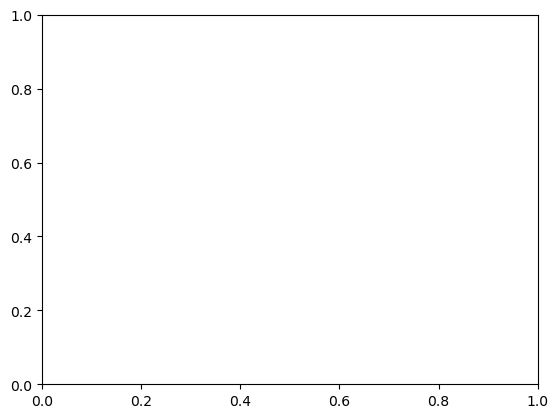

In [14]:
custom_palette = sns.color_palette("Set2", 4)

sns.barplot(x='Models', y='R2_SCORE', data=final_data, hue='Models', palette=custom_palette, legend=False)


We Can See That Linear Regression is the best model to use 

# Model Training (Clasification)

In [15]:
y_train = [1 if value>0.7 else 0 for value in y_train]
y_test = [1 if value>0.7 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_1= lr.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_2 = svm.predict(X_test)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_3 = knn.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_4 = rf.predict(X_test)

gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred_5 = gr.predict(X_test)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

# Evaluate Model (Clasification)


In [17]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                           'ACC_SCORE':[accuracy_score(y_test,y_pred_1),accuracy_score(y_test,y_pred_2),
                                        accuracy_score(y_test,y_pred_3),accuracy_score(y_test,y_pred_4),
                                        accuracy_score(y_test,y_pred_5)]})
final_data

,Models,ACC_SCORE
0,LR,0.8250
1,SVC,0.7500
2,KNN,0.8375
3,RF,0.8375
4,GBC,0.8375


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, prec, recall, f1

models = ['LR', 'SVC', 'KNN', 'RF', 'GBC']
preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

accs = []
precs = []
recalls = []
f1s = []

for y_pred in preds:
    acc, prec, recall, f1 = evaluate(y_test, y_pred)
    accs.append(acc)
    precs.append(prec)
    recalls.append(recall)
    f1s.append(f1)
    
evaluate_mod = pd.DataFrame({
    'Model' : models,
    'Accuracy' : accs,
    'Precision' : precs,
    'Recall' : recalls,
    'F1 Score' : f1s
})

print(evaluate_mod)

  Model  Accuracy  Precision  Recall  F1 Score
0    LR    0.8250   0.824243  0.8250  0.824089
1   SVC    0.7500   0.824627  0.7500  0.717582
2   KNN    0.8375   0.836979  0.8375  0.837105
3    RF    0.8375   0.837250  0.8375  0.836144
4   GBC    0.8375   0.837250  0.8375  0.836144


AttributeError: 'Rectangle' object has no property 'legend'

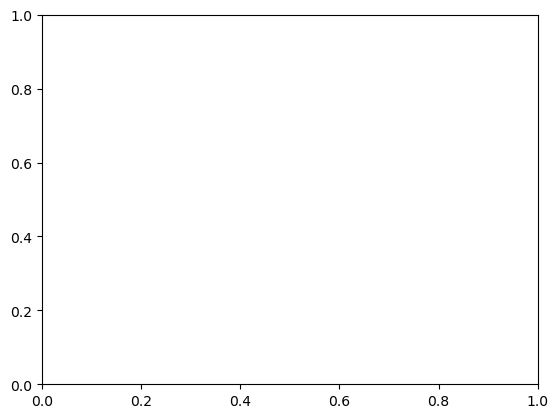

In [19]:
custom_palette = sns.color_palette("Set2", 5)

sns.barplot(x='Models', y='ACC_SCORE', data=final_data, hue='Models', palette=custom_palette, legend=False)


Random Forest (RF) is the best model to use

# Saving Model

In [ ]:
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']
y  = [1 if value>0.7 else 0 for value in y]
y = np.array(y)
y
sc = StandardScaler()
X = sc.fit_transform(X)
gr = RandomForestClassifier()
gr.fit(X,y)
y

In [ ]:
joblib.dump(gr,'admission_model')
model = joblib.load('admission_model')
df.columns

In [ ]:
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

# GUI

In [ ]:
joblib.dump(rf,'admission_model')

In [ ]:
model = joblib.load('admission_model')

In [ ]:
model.predict([[300,80,4,4.5,4.5,6,1]])

In [ ]:
def validate_input(event):
    entry_ranges = {
        e1: (260, 340), 
        e2: (0, 120),     
        e3: (1, 5),     
        e4: (1, 5),       
        e5: (1, 5),       
        e6: (0, 10),     
        e7: (0, 1)       
    }
    
    try:
        min_value, max_value = entry_ranges[event.widget]
        value = float(event.widget.get())
        
        if not (min_value <= value <= max_value):
            raise ValueError
        
    except ValueError:
        messagebox.showerror("Error", f"Please enter a valid number between {min_value} and {max_value}.")
        event.widget.delete(0, END)  

def show_entry():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())

        model = joblib.load('admission_model')
        result = model.predict(sc.transform([[p1, p2, p3, p4, p5, p6, p7]]))

        if result == 1:
            result_label.config(text="High Chance of getting admission !!", fg="green")
        else:
            result_label.config(text="Low Chance of Admission !!", fg="red")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values.")


master = Tk()
master.title("Graduate Admission Analysis and Prediction")

master.configure(bg="#ffffcc")
master.geometry("400x300")

header_label = Label(master, text="Graduate Admission Prediction", font=("Arial", 16), bg="#ffffcc", fg="#333", anchor="e") 
header_label.grid(row=0, columnspan=2, pady=10, sticky="e")

input_frame = Frame(master, bg="#ffffcc") 
input_frame.grid(row=1, columnspan=2, pady=10)

Label(input_frame, text="GRE Score (260-340):", bg="#ffffcc", anchor="e").grid(row=0, column=0, padx=5, sticky="e") 
Label(input_frame, text="TOEFL Score (0-120):", bg="#ffffcc", anchor="e").grid(row=1, column=0, padx=5, sticky="e") 
Label(input_frame, text="University Rating (1-5):", bg="#ffffcc", anchor="e").grid(row=2, column=0, padx=5, sticky="e") 
Label(input_frame, text="SOP (1-5):", bg="#ffffcc", anchor="e").grid(row=3, column=0, padx=5, sticky="e") 
Label(input_frame, text="LOR (1-5):", bg="#ffffcc", anchor="e").grid(row=4, column=0, padx=5, sticky="e") 
Label(input_frame, text="CGPA (0-10):", bg="#ffffcc", anchor="e").grid(row=5, column=0, padx=5, sticky="e") 
Label(input_frame, text="Research (0/1):", bg="#ffffcc", anchor="e").grid(row=6, column=0, padx=5, sticky="e") 

e1 = Entry(input_frame)
e2 = Entry(input_frame)
e3 = Entry(input_frame)
e4 = Entry(input_frame)
e5 = Entry(input_frame)
e6 = Entry(input_frame)
e7 = Entry(input_frame)

e1.grid(row=0, column=1, padx=5)
e2.grid(row=1, column=1, padx=5)
e3.grid(row=2, column=1, padx=5)
e4.grid(row=3, column=1, padx=5)
e5.grid(row=4, column=1, padx=5)
e6.grid(row=5, column=1, padx=5)
e7.grid(row=6, column=1, padx=5)

for entry in (e1, e2, e3, e4, e5, e6, e7):
    entry.bind("<FocusOut>", validate_input)

predict_button = Button(master, text="Predict", command=show_entry, bg="#4CAF50", fg="white", font=("Arial", 12))
predict_button.grid(row=2, column=0, columnspan=2, pady=10)

result_label = Label(master, text="", font=("Arial", 14), bg="#ffffcc")
result_label.grid(row=3, columnspan=2)

master.mainloop()
